In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
df=pd.read_csv("Affairs.csv")
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['gender']= label_encoder.fit_transform(df['gender'])
df['children']=label_encoder.fit_transform(df['children'])
df=df.drop('X',axis=1)
df

,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating
0,0,1,37.0,10.00,0,3,18,7,4
1,0,0,27.0,4.00,0,4,14,6,4
2,0,0,32.0,15.00,1,1,12,1,4
3,0,1,57.0,15.00,1,5,18,6,5
4,0,1,22.0,0.75,0,2,17,6,3
...,...,...,...,...,...,...,...,...,...
596,1,1,22.0,1.50,1,1,12,2,5
597,7,0,32.0,10.00,1,2,18,5,4
598,2,1,32.0,10.00,1,2,17,6,5
599,2,1,22.0,7.00,1,3,18,6,2


In [ ]:
df.isnull().sum()

affairs          0
gender           0
age              0
yearsmarried     0
children         0
religiousness    0
education        0
occupation       0
rating           0
dtype: int64

In [ ]:
#df.feature_importance

In [ ]:
#_affair= df[df['affairs'] > 1]
#_affair

In [ ]:
x=df.drop('affairs',axis=1)
y=df['affairs']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=1)
y_train=y_train.values.reshape(-1,1)
y_test=y_test.values.reshape(-1,1)

<Axes: xlabel='yearsmarried', ylabel='affairs'>

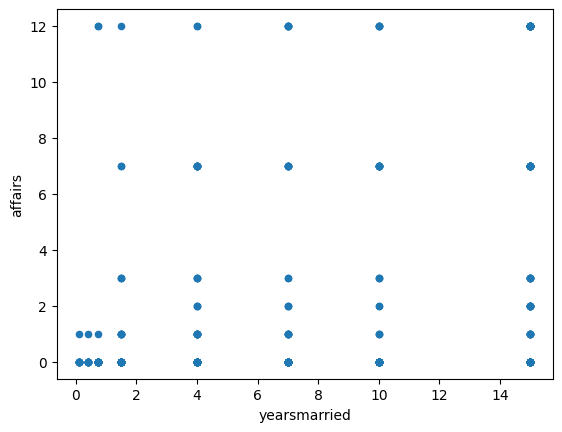

In [ ]:
df.plot(x = 'yearsmarried', y = 'affairs', kind = 'scatter')

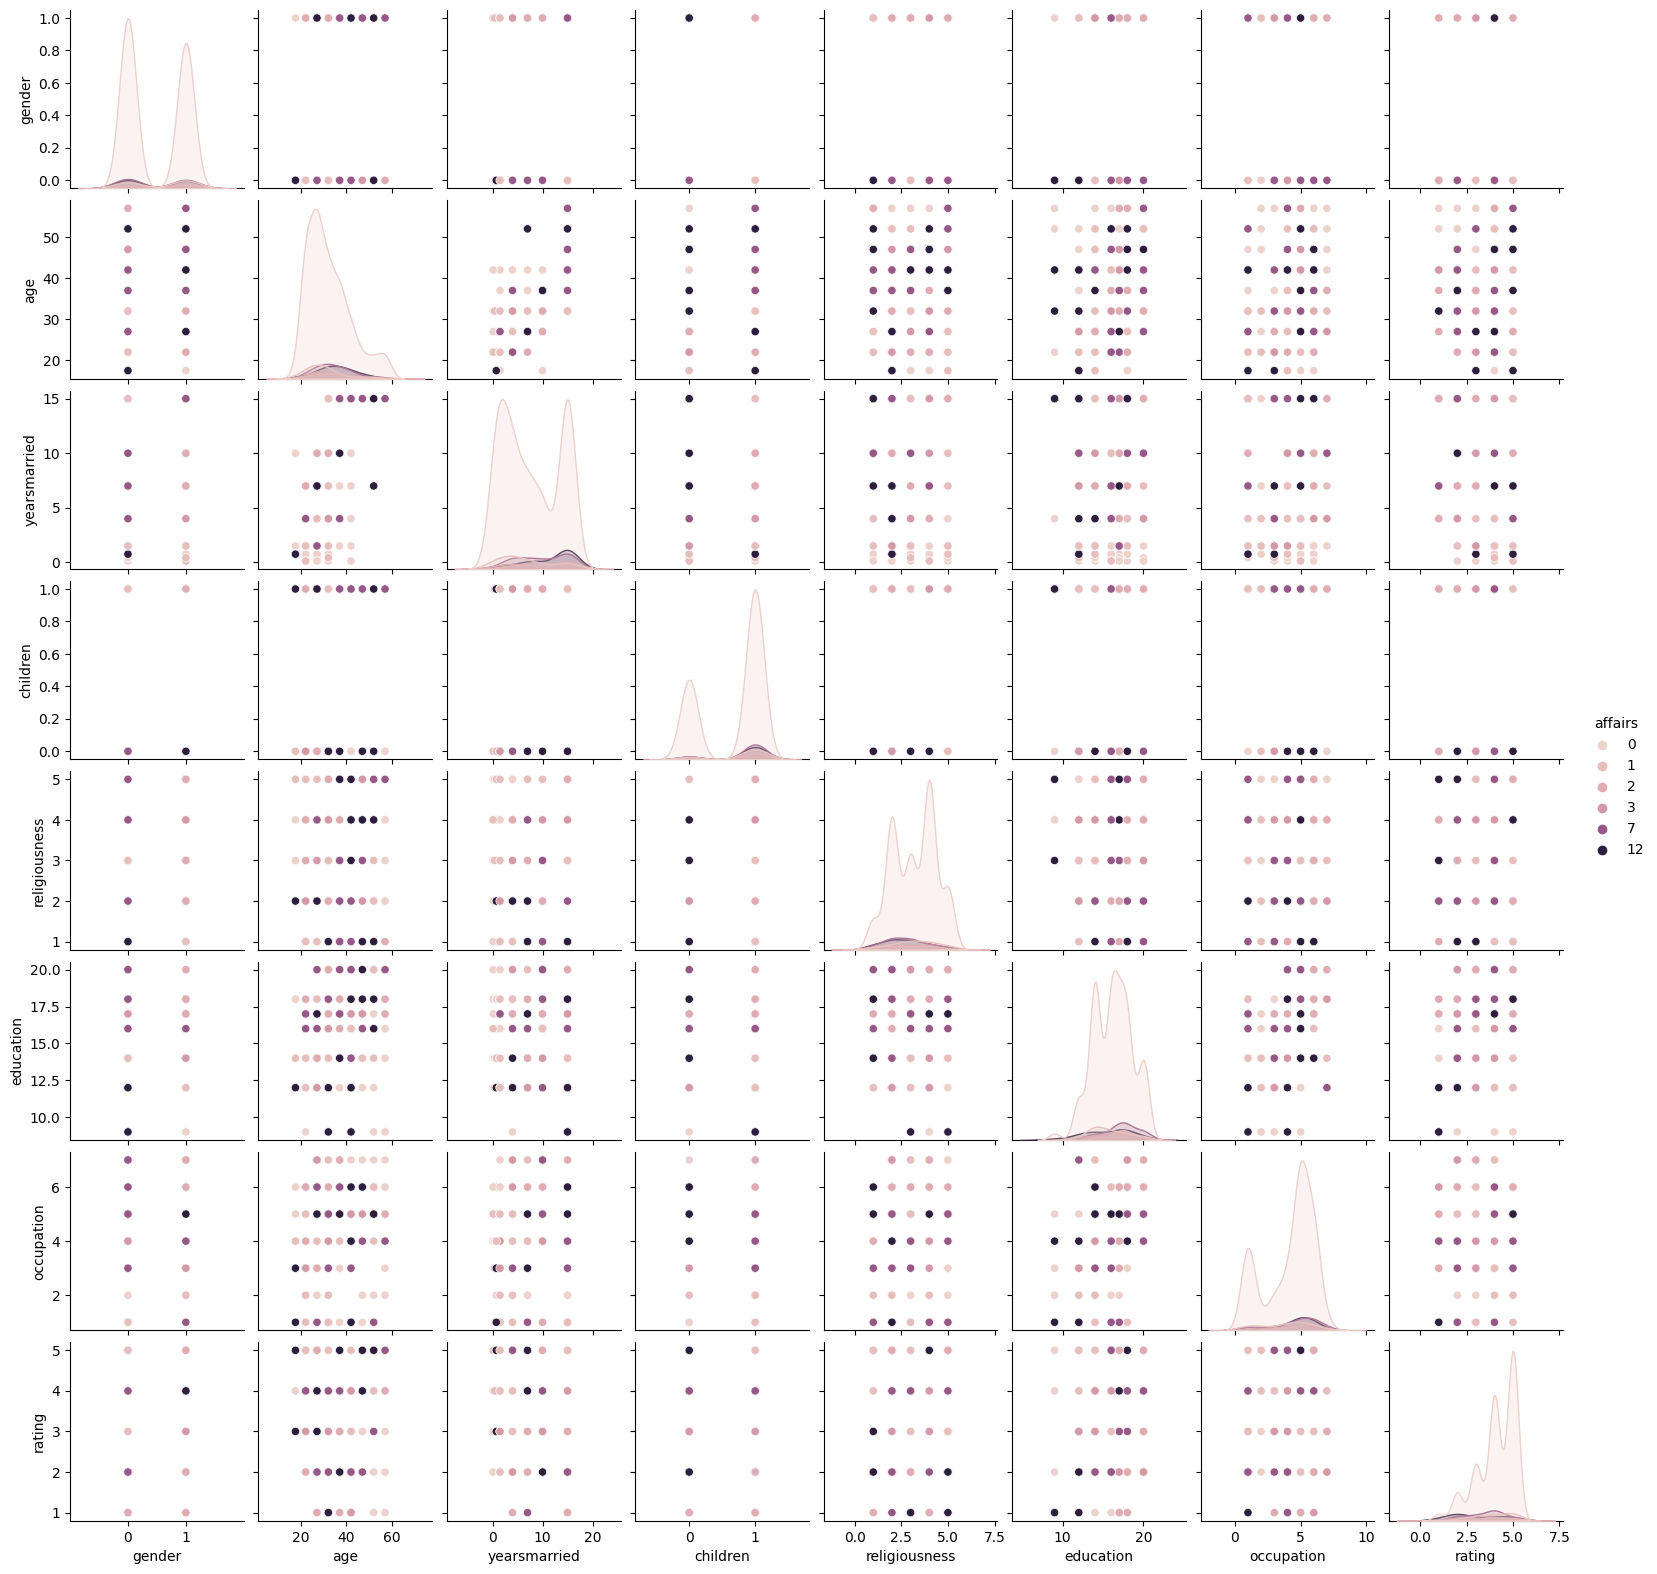

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df, hue='affairs', height=2)

In [ ]:
#X_train, X_test,y_train, y_test = train_test_split(x, y, test_size=0.4,random_state=1)
reg = LogisticRegression()

In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
print("Logistic Regression model accuracy(in %):",accuracy_score(y_test, y_pred)*100)

Logistic Regression model accuracy(in %): 73.36683417085426


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Axes: title={'center': 'Feature Importance'}>

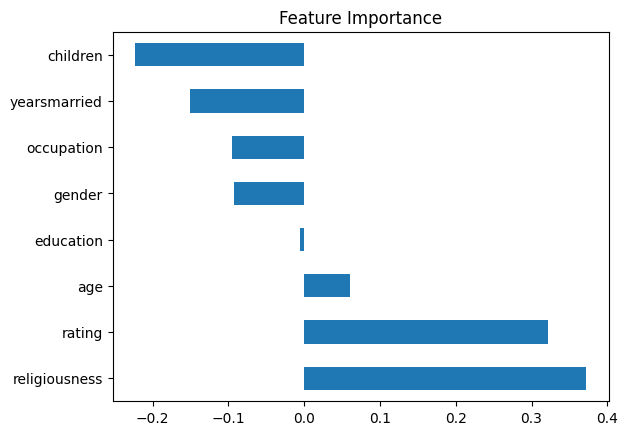

In [43]:
importance = reg.coef_[0]
#importance is a list so you can plot it.
feat_importances = pd.Series(importance,index=x.columns)
feat_importances.nlargest(20).plot(kind='barh',title = 'Feature Importance')

In [40]:
importance

array([-0.09298805,  0.06022913, -0.15010908, -0.22293815,  0.37189129,
       -0.00539066, -0.09501593,  0.32164221])

In [51]:
#from sklearn.metrics import ConfusionMatrixDisplay
#conf=confusion_matrix(y_test,y_pred)
#cmd_obj=ConfusionMatrixDisplay(conf,display_labels=['gender','age','yearsmarried','children','religiousness','education','occupation','rating'])
#cmd_obj.plot( )
#sns.heatmap(conf,annot=True,fmt='g')
#plt.show()
print("Report card",classification_report(y_test,y_pred))

Report card               precision    recall  f1-score   support

           0       0.75      0.98      0.85       148
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         4
           7       0.00      0.00      0.00        15
          12       1.00      0.06      0.11        17

    accuracy                           0.73       199
   macro avg       0.29      0.17      0.16       199
weighted avg       0.64      0.73      0.64       199



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
